In [1]:
import pandas as pd 
from unidecode import unidecode 
from modeling_utils.modeling_utils import *
import numpy as np
import yaml
import pickle
import os
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
with open('config/config.yaml', 'r') as file:
    yaml_data = yaml.load(file, Loader=yaml.FullLoader)
    for dat in yaml_data:
        print(dat,':' ,yaml_data[dat])

DEBUG : True
PATH_TO_CSV : C:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling\20231007200103_query_results.csv
N_ROWS : 500000
ELBOW_MIN : 20
ELBOW_MAX : 100
ELBOW_N : 50
ITEMS_TO_CONSIDER : 15
USE_AWARDED : False
CLUSTERIZATION_TYPE : kmeans


In [3]:
DEBUG = True 
print("Loading csv") 
df = pd.read_csv(yaml_data['PATH_TO_CSV'],
                    encoding="utf-8" , 
                    nrows=yaml_data['N_ROWS'])
print("Cleaning csv")
df['first_two_digits_code'] = df['agileitemsmp_id'].apply(lambda x: str(x)[:2])
df['feature_vector']= df['first_two_digits_code'] + ' '+ df['agileoffereditemsdescripcionofertada']
corpus = df['feature_vector'].apply(lambda x: unidecode(x).lower())

file_path_vectorizer = os.path.join(os.getcwd(), 
                             
                            'models',
                            'count_vectorized_model.pkl')

file_path_vectorized_c = os.path.join(os.getcwd(), 
                                         
                                        'csv',
                                        'vectorized_corpus.csv')

with open(file_path_vectorizer, 'rb') as model_file:
    vectorizer = pickle.load(model_file)
    
 
vectorized_corpus = pd.read_csv(file_path_vectorized_c)

print('Dimensionality Reduction')
tsne_data = tsne_reduction(vectorized_corpus)


Loading csv
Cleaning csv
Dimensionality Reduction


In [4]:
#auto_n_cluster = auto_elbow_method(tsne_data,
#                                    np.linspace(yaml_data['ELBOW_MIN'],yaml_data['ELBOW_MAX'],yaml_data['ELBOW_N'],dtype = int),
#                                    plot = DEBUG)  
#print('Generating Kmeans clusters')


In [5]:
auto_n_cluster = 33

c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorica

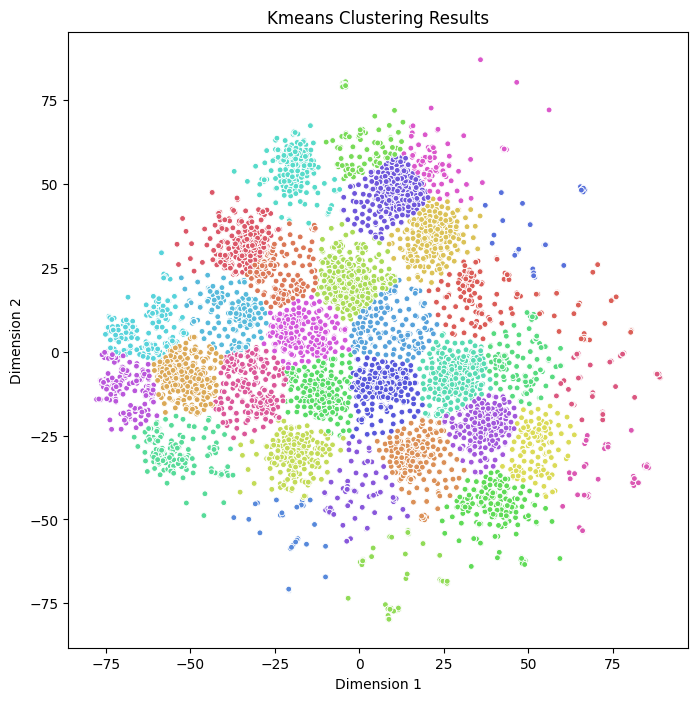

(7472,) (7472,)
Exporting Kmeans model
Done


In [6]:
kmeans_model, kmeans_clusters = launch_kmeans(auto_n_cluster,
                                tsne_data,
                                corpus.unique(),
                                plot=DEBUG)

file_path_model = os.path.join(os.getcwd(), 
                            'models',
                            'kmeans_model.pkl')

print('Exporting Kmeans model')
with open(file_path_model, 'wb') as model_file:
    pickle.dump(kmeans_model, model_file)

file_path = os.path.join(os.getcwd(), 
                    'csv',
                    'kmeans_clusters.csv')

kmeans_clusters.to_csv(file_path, index=False)
print('Done')

c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


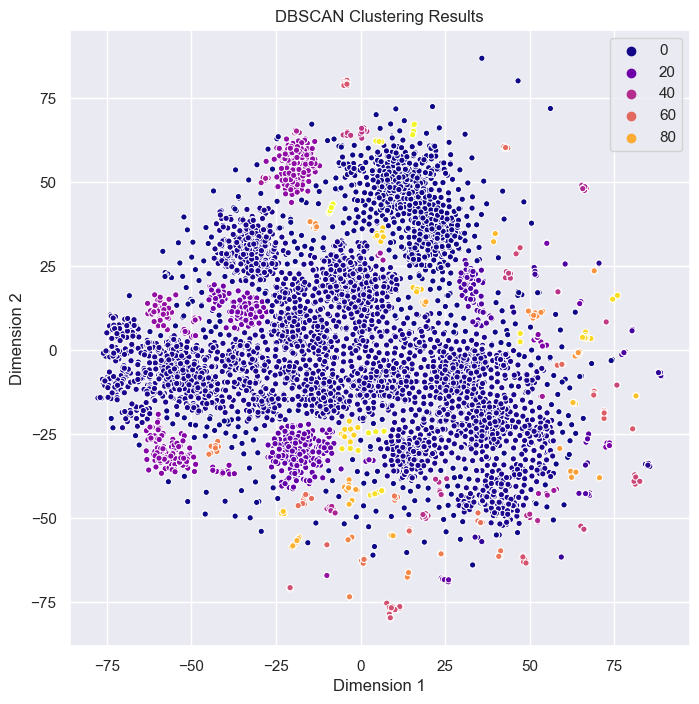

In [7]:
 
dbscan_clusters = launch_dbscan(2.5,7, tsne_data,corpus.unique(),plot = True)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive

# Generate sample data
np.random.seed(42)
x = np.random.rand(100)
y = np.random.rand(100)

In [9]:
def kmeans_int(marker_size):
    kmeans_model, kmeans_clusters = launch_kmeans(marker_size,
                                tsne_data,
                                corpus.unique(),
                                plot=DEBUG)
    return kmeans_model,kmeans_clusters

In [10]:
# Create a scatter plot function with a marker size parameter
def scatter_plot(marker_size):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, s=marker_size)
    plt.title(f'Scatter Plot (Marker Size: {marker_size})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Create a slider widget
marker_size_slider = widgets.IntSlider(
    value=20,
    min=5,
    max=120,
    step=3,
    description='Marker Size:',
    continuous_update=True# Set to False to update the plot only when the slider is released
)

 

# Create an interactive plot
interactive_plot = interactive(kmeans_int, marker_size=marker_size_slider)

# Display the interactive plot
interactive_plot



interactive(children=(IntSlider(value=20, description='Marker Size:', max=120, min=5, step=3), Output()), _dom…

In [11]:
file_path_model = os.path.join(os.getcwd(), 
                            'ProviderDescriptionBased', 
                            'models',
                            'kmeans_model.pkl')
print('Exporting Kmeans model')
with open(file_path_model, 'wb') as model_file:
    pickle.dump(kmeans_model, model_file)

file_path = os.path.join(os.getcwd(), 
                    'ProviderDescriptionBased', 
                    'csv',
                    'kmeans_clusters.csv')

kmeans_clusters.to_csv(file_path, index=False)

print('Done')

Exporting Kmeans model


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\Modeling\\ProviderDescriptionBased\\ProviderDescriptionBased\\models\\kmeans_model.pkl'